In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Step 1: Load Dataset
train = pd.read_csv("Task 2 Dataset - Titanic (Train).csv")
test = pd.read_csv("Task 2 Dataset - Titanic (Test).csv")

In [33]:
# Preview the dataset
print("Train Dataset:")
display(train.head())
print("Test Dataset:")
display(test.head())


Train Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test Dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
# Step 2: Basic Information
print("Train info:")
train.info()
print("Train description:")
display(train.describe())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Train description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# Check missing values
print("Missing values in train dataset:")
print(train.isnull().sum())

Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
# Step 3: Data Cleaning

# Fill missing 'Age' with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing)
train.drop(columns='Cabin', inplace=True)

# Check duplicates
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


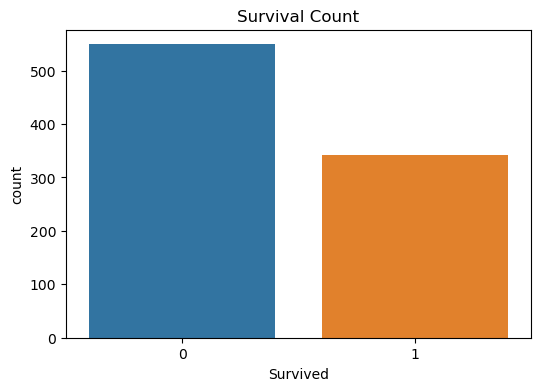

In [41]:
# Step 4: Exploratory Data Analysis (EDA)

# 1. Survival distribution
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Survived')
plt.title("Survival Count")
plt.show()


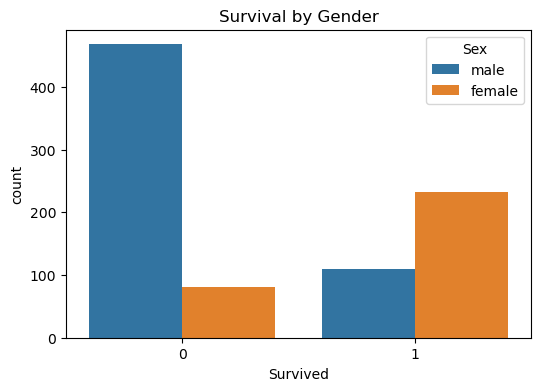

In [43]:
# 2. Gender vs Survival
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title("Survival by Gender")
plt.show()

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


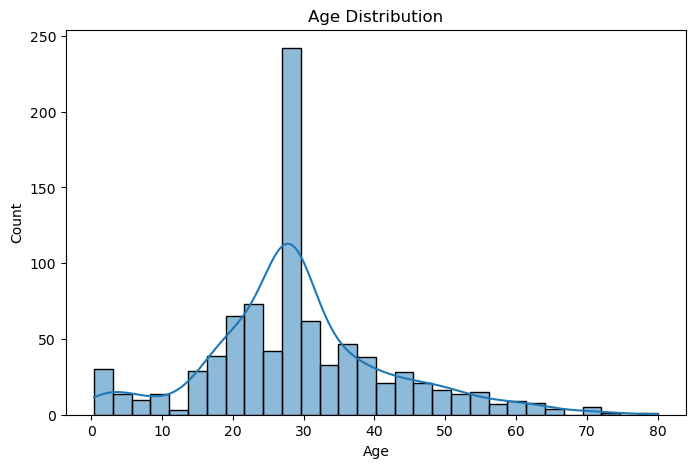

In [45]:
# 3. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

C:\Users\hello\AppData\Local\Temp\ipykernel_11480\2139586331.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[train['Survived']==1, 'Age'], label='Survived', shade=True)
C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hello\AppData\Local\Temp\ipykernel_11480\2139586331.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[train['Survived']==0, 'Age'], label='Not Survived', shade=True)
C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

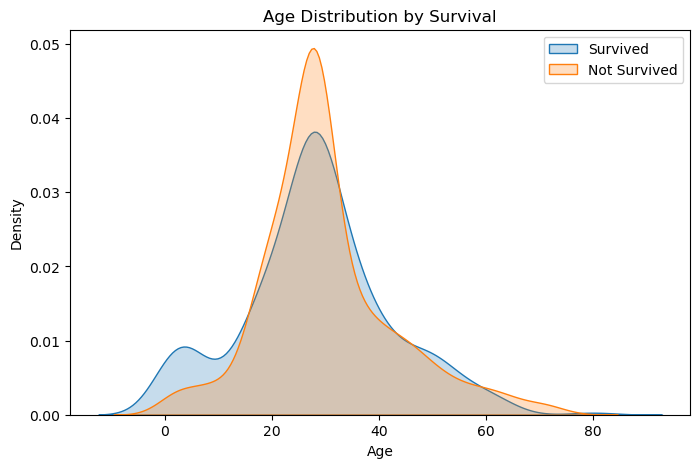

In [47]:
# 4. Age vs Survival
plt.figure(figsize=(8,5))
sns.kdeplot(train.loc[train['Survived']==1, 'Age'], label='Survived', shade=True)
sns.kdeplot(train.loc[train['Survived']==0, 'Age'], label='Not Survived', shade=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


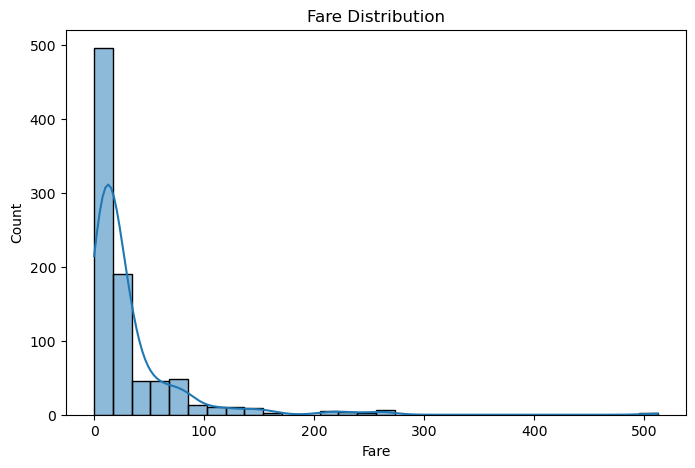

In [49]:
# 5. Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()